### word Cloud

In [13]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt



- Stopwords

In [14]:
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
#wordcloud 에서 제공하는 불용어 set 형식 중복이 없음
sw_wc =STOPWORDS
print(sw_wc)

{'its', 'only', 'yourselves', 'but', 'herself', 'could', 'any', 'until', 'else', 'their', 'again', 'how', 'these', 'can', 'over', 'should', 'the', "where's", "we'd", 'once', 'ought', 'get', 'to', "i'll", "hadn't", "you've", "shouldn't", 'just', 'before', 'themselves', "didn't", 'nor', 'it', 'with', 'where', 'against', 'if', 'above', 'who', 'some', 'own', 'hence', 'ourselves', "who's", "they'll", "they've", 'those', 'off', "what's", "when's", 'said', "she'll", 'not', 'theirs', 'or', 'out', 'up', 'having', "won't", 'cannot', 'would', 'all', 'through', 'www', 'because', 'k', 'then', "he's", 'on', "wasn't", 'doing', 'so', 'why', 'hers', "he'll", 'ours', "doesn't", 'been', "why's", 'down', 'from', "i'd", 'no', 'a', 'such', 'are', 'therefore', 'my', 'we', "there's", "we're", "can't", "weren't", 'you', 'whom', 'they', 'yourself', "that's", 'them', "wouldn't", "i've", 'between', 'in', 'ever', 'there', 'am', 'himself', 'shall', 'more', 'each', 'were', "she's", "how's", "she'd", "you're", 'howev

In [16]:
len(sw_nltk),len(sw_wc)

(179, 193)

- Alice in wonderland

In [17]:
with open('data/Alice.txt')as f:
    text =f.read()

In [18]:
# 불용어에 'said' 추가
sw_wc.add('said')


In [19]:
wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=sw_wc
    ).generate(text)

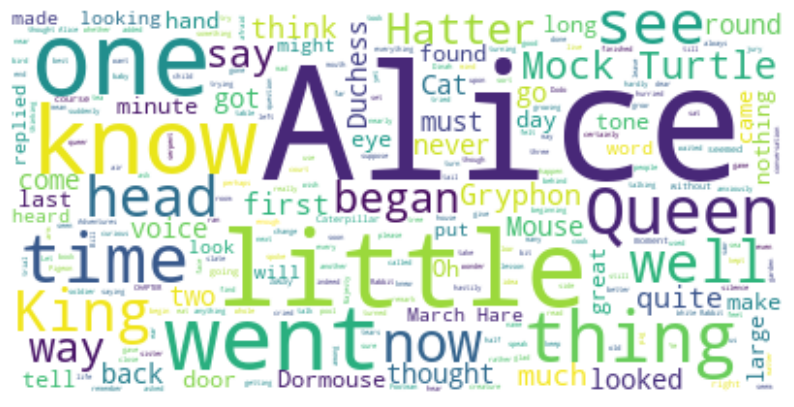

In [21]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
#사용 빈도 Top 10
count =0
for key,val in wc.words_.items():
    print(f'{key}:\t{val}')
    count += 1
    if count > 10:
        break

Alice:	1.0
little:	0.29508196721311475
one:	0.27595628415300544
know:	0.2459016393442623
went:	0.226775956284153
thing:	0.2185792349726776
time:	0.2103825136612022
Queen:	0.20765027322404372
see:	0.1830601092896175
King:	0.17486338797814208
well:	0.1721311475409836


- 배경 그림위에 표시하기 

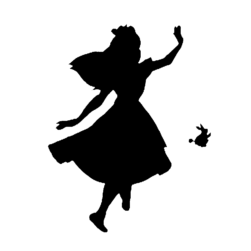

In [30]:
mask =np.array(Image.open('data/Alice_mask.png'))
plt.figure(figsize=(5,3))
plt.imshow(mask, cmap=plt.cm.gray,interpolation='bilinear')
plt.axis('off');

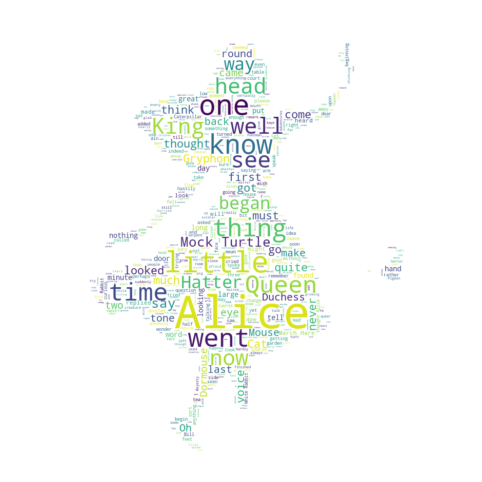

In [26]:
wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=sw_wc,
    mask=mask 
    ).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- Star Wars

In [27]:
with open('data/A_new_hope.txt') as f:
    text =f.read()

text =text.replace('HAN','Han').replace("LUKE's",'luke')

In [28]:
sw =STOPWORDS
sw.add('int')
sw.add('ext')
len(sw)

195

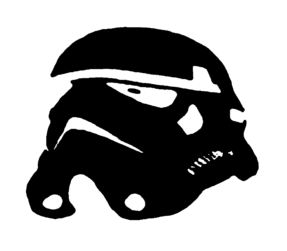

In [31]:
mask =np.array(Image.open('data/Stormtrooper_mask.png'))
plt.figure(figsize=(5,3))
plt.imshow(mask, cmap=plt.cm.gray,interpolation='bilinear')
plt.axis('off');

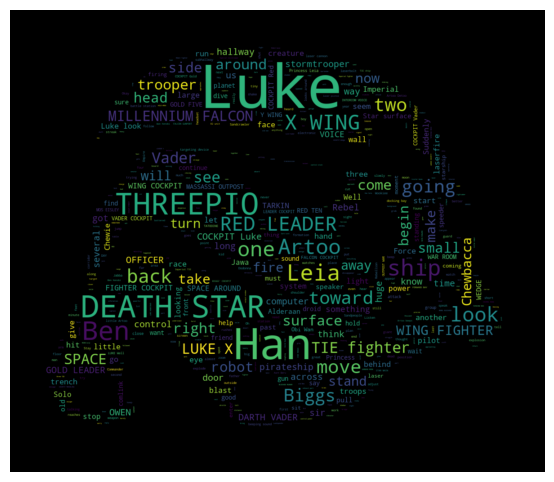

In [34]:
wc = WordCloud(
    mask=mask ,max_words=1000,stopwords=sw,
    margin=10,random_state=2023
).generate(text)
default_colors =wc.to_array

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')#imshow() 함수는 이미지를 그리기 위한 함수
plt.axis('off')   #축 제거하기
plt.show()

In [37]:
#HSL :Hue,Saturation(채도) ,Lightness(명도)
def grey_color(word,font_size,position,orientation,random_state,**kwargs):
    return f'hsl(0,0%,{np.random.randint(60,101)}%)'

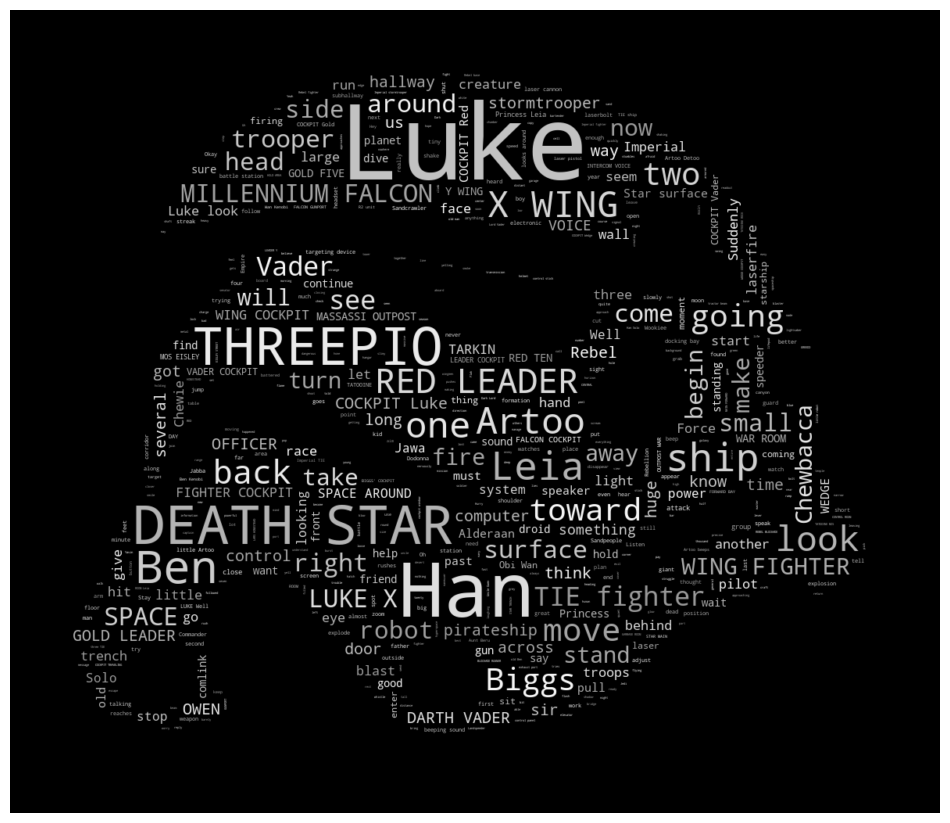

In [38]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color,random_state=2023),
                      interpolation='bilinear')
plt.axis('off');
